## MSBDS 590
Capstone: Ovarian Health

# Import Libraries

In [1]:
import numpy 
numpy.__version__ 
'1.21.4' 

C:\Users\south\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'1.21.4'

In [2]:
#import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mrmr
import os
%matplotlib inline

# Read Data

In [3]:
#Reading the dataset
oc = pd.read_csv('oc.csv')
oc 

TYPE    MPV  BASO#  PHOS   GLU.     K   AST  BASO%    Mg  Menopause  ...  \
0       0  11.70   0.01  1.46   4.67  5.36  24.0   0.30  0.78          0  ...   
1       0  10.00   0.02  1.09  10.50  4.38  13.0   0.30  0.82          1  ...   
2       0  11.40   0.03  0.97   4.64  4.30  18.0   0.60  1.00          0  ...   
3       0   7.38   0.05  1.25   4.76  4.70  17.0   0.74  1.11          1  ...   
4       0  10.40   0.01  0.94   4.07  4.77  27.0   0.10  1.08          0  ...   
..    ...    ...    ...   ...    ...   ...   ...    ...   ...        ...  ...   
230     1  10.60   0.02  1.42   4.46  4.05  19.0   0.70  1.11          0  ...   
231     1  11.20   0.07  1.16   5.13  3.99  24.0   0.90  1.27          0  ...   
232     1   8.34   0.05  1.00   5.34  4.74  13.0   0.85  0.98          1  ...   
233     1   8.68   0.07  1.59   5.01  4.27  16.0   1.34  0.93          0  ...   
234     1  11.80   0.01  1.06   5.92  3.94  10.0   0.10  1.20          0  ...   

       TP     UA   RBC    PCT  CO2CP  TBIL    HCT  MONO%    MCV   ALP  
0    73.9  396.4  2.64  0.090   19.9   5.5  0.273   5.70  103.4  56.0  
1    72.0  119.2  4.89  0.300   22.3   6.8  0.417   5.50   85.3  95.0  
2    77.9  209.2  4.62  0.130   22.2  14.8  0.391   5.40   84.6  77.0  
3    66.1  215.6  4.01  0.250   24.0  10.9  0.372   6.55   92.6  26.0  
4    66.5  206.0  4.40  0.280   26.2   5.3  0.383  10.00   87.0  47.0  
..    ...    ...   ...    ...    ...   ...    ...    ...    ...   ...  
230  72.6  167.3  4.51  0.180   22.2   9.5  0.386  12.14   85.6  51.0  
231  72.4  184.1  4.55  0.340   25.2  17.7  0.403   4.90   88.6  78.0  
232  77.6  346.6  4.33  0.175   23.8   9.2  0.372   6.55   85.8  63.0  
233  72.0  333.0  4.15  0.144   25.3  12.9  0.370  10.00   89.1  66.0  
234  61.7  186.4  4.05  0.180   22.1   9.3  0.365   4.60   90.1  57.0  

[235 rows x 49 columns]

# Exploratory Data Analysis part 1

In [4]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TYPE       235 non-null    int64  
 1   MPV        235 non-null    float64
 2   BASO#      235 non-null    float64
 3   PHOS       235 non-null    float64
 4   GLU.       235 non-null    float64
 5   K          235 non-null    float64
 6   AST        235 non-null    float64
 7   BASO%      235 non-null    float64
 8   Mg         235 non-null    float64
 9   Menopause  235 non-null    int64  
 10  CL         235 non-null    float64
 11  CEA        235 non-null    float64
 12  EO#        235 non-null    float64
 13  CA19-9     235 non-null    float64
 14  ALB        235 non-null    float64
 15  IBIL       235 non-null    float64
 16  GGT        235 non-null    float64
 17  MCH        235 non-null    float64
 18  GLO        235 non-null    float64
 19  ALT        235 non-null    float64
 20  DBIL      

In [5]:
#too many variables, so let's narrow down to variables that correlate with CA125 by creating a new dataframe
oc1 = oc[['CA125', 'RBC', 'ALP', 'PCT', 'NEU', 'PLT', 'HE4', 'Age', 'Ca', 'Menopause']]

In [6]:
# Assign risk to CA125 values greater than 35, as these levels may be indicative of cancer
oc1['CA125'].values[oc1['CA125'] > 35] = 1

In [7]:
oc1['CA125'].values[oc1['CA125'] < 35] = 0

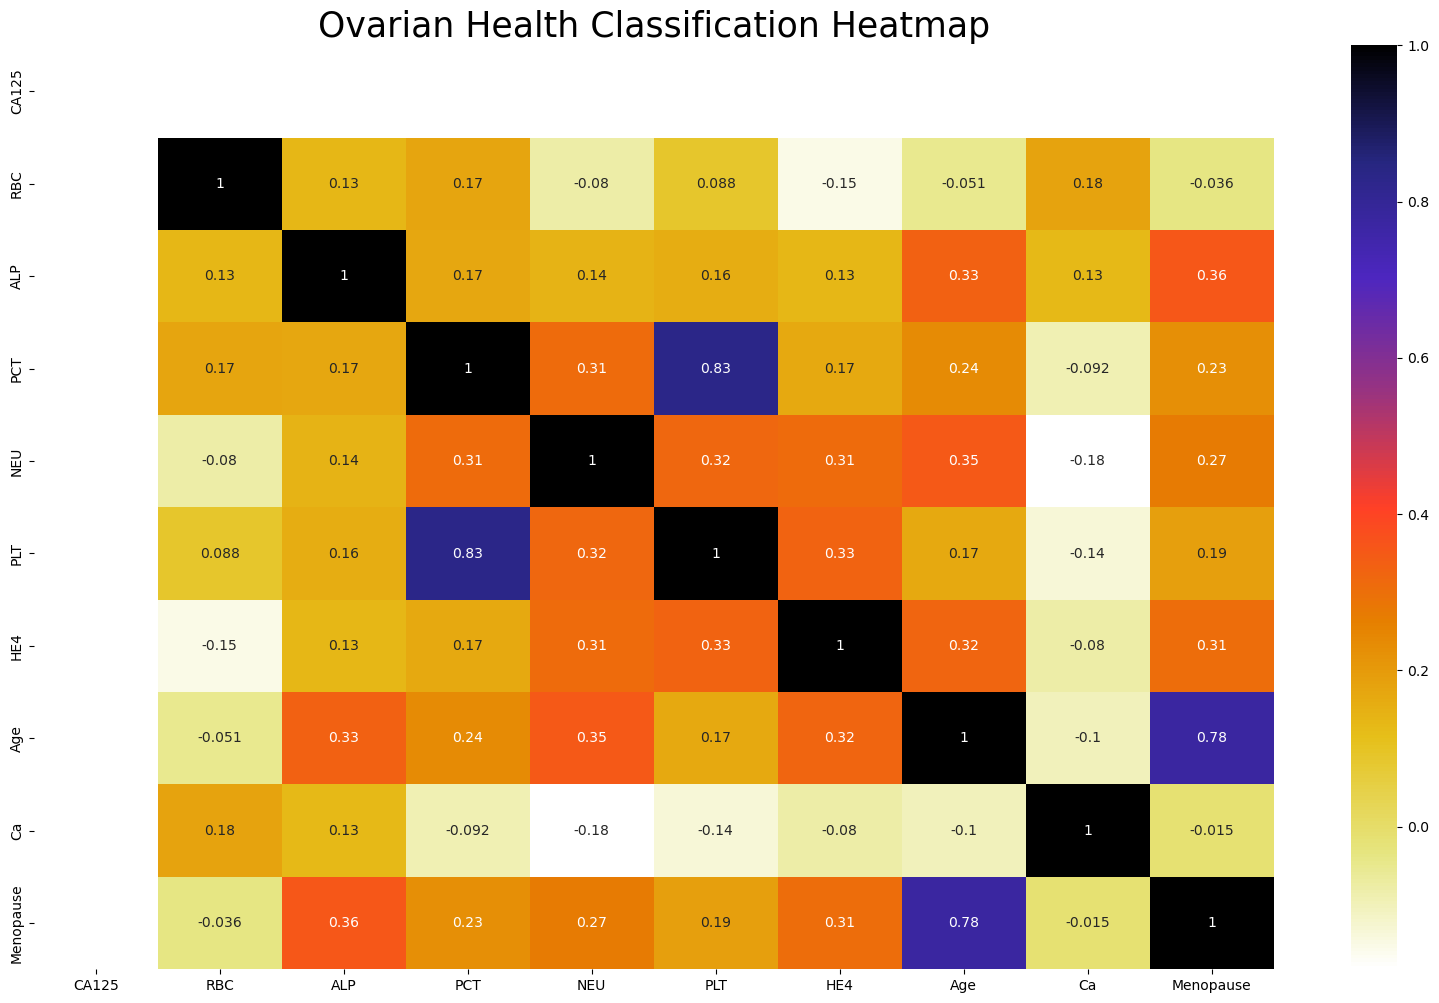

In [8]:
cor = oc1.corr()
plt.figure(figsize=(20,12))
plt.title('Ovarian Health Classification Heatmap', fontsize=25)
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

# Exploratory Data Analysis part 2

# Visualizing the original clean data with a scatterplot

In [9]:
import plotly.express as px
fig = px.scatter(oc, x="Age", y="Age", color ="CA125",
                 size='CA125', hover_data=['CA125'])
fig.show()

#Menopause is associated with higher CA125 levels

In [10]:
import plotly.express as px
fig = px.scatter(oc, x="Menopause", y="Menopause", color ="CA125",
                 size='CA125', hover_data=['CA125'])
fig.show()

#Menopause is associated with higher CA125 levels

In [11]:
import plotly.express as px
fig = px.scatter(oc, x="HE4", y="HE4", color ="CA125",
                 size='CA125', hover_data=['CA125'])
fig.show()

#The relationship between HE4 and CA125 levels is not substantially supported from this visualization.

In [12]:
import plotly.express as px
fig = px.scatter(oc, x="Ca", y="Ca", color ="CA125",
                 size='CA125', hover_data=['CA125'])
fig.show()

#Elevated Calcium correlates with elevated CA125 levels

In [13]:
import plotly.express as px
fig = px.scatter(oc, x="CA125", y="CA125", color ="ALP",
                 size='CA125', hover_data=['CA125'])
fig.show()

#Elevated ALP correlates with elevated CA125 levels

# The Scatterplot supports that CA125 is higher as ALP and Ca levels increase but not for HE4

# FINAL Preliminary OBSERVATIONS
- Higher Calcium levels are associated with higher CA125 levels of risk.
- Higher ALP levels are associated with higher CA125 levels of risk.
- Higher HE4 levels are not supported as related with higher CA125 levels of risk with this dataset.
- As expected, menopause and age correlate with higher CA125 levels

In [14]:
#mRMR Selected features

In [15]:
# split data into features (X) and target (y)
oc_X_train = oc.drop('TYPE', axis=1)
oc_y_train = oc['TYPE']

In [16]:
# select top 10 features using MRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X = oc_X_train, y = oc_y_train, K = 10)

100%|██████████| 10/10 [00:00<00:00, 12.77it/s]


In [17]:
selected_features #Retaining the Age demographic for postmenopausal women, means that CA125 is not in the top 10 features, but it is 11th if K is set to a number 11+

['Age',
 'CREA',
 'LYM%',
 'AST',
 'CA125',
 'PDW',
 'Menopause',
 'NEU',
 'CEA',
 'LYM#']

In [18]:
# Visualizing the correlation between the features in the training data
selected_cols = selected_features + ['TYPE']

# Selecting the row or column corresponding to the target column
target_corr = oc[selected_cols].corr()['TYPE']

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column \n")
print(target_corr)

Correlation of selected features with target column 

Age         -0.482835
CREA         0.203932
LYM%         0.433557
AST         -0.324609
CA125       -0.323591
PDW          0.324485
Menopause   -0.416604
NEU         -0.428291
CEA         -0.152384
LYM#         0.357680
TYPE         1.000000
Name: TYPE, dtype: float64


In [19]:
# Selecting the row or column corresponding to the target column
target_corr = oc[selected_cols].corr()['TYPE']
target_corr = np.sqrt(target_corr ** 2) # find the magnitude of each correlation

# Displaying the correlation values of each feature with the target column in descending order
print(target_corr.sort_values(ascending=False))

TYPE         1.000000
Age          0.482835
LYM%         0.433557
NEU          0.428291
Menopause    0.416604
LYM#         0.357680
AST          0.324609
PDW          0.324485
CA125        0.323591
CREA         0.203932
CEA          0.152384
Name: TYPE, dtype: float64


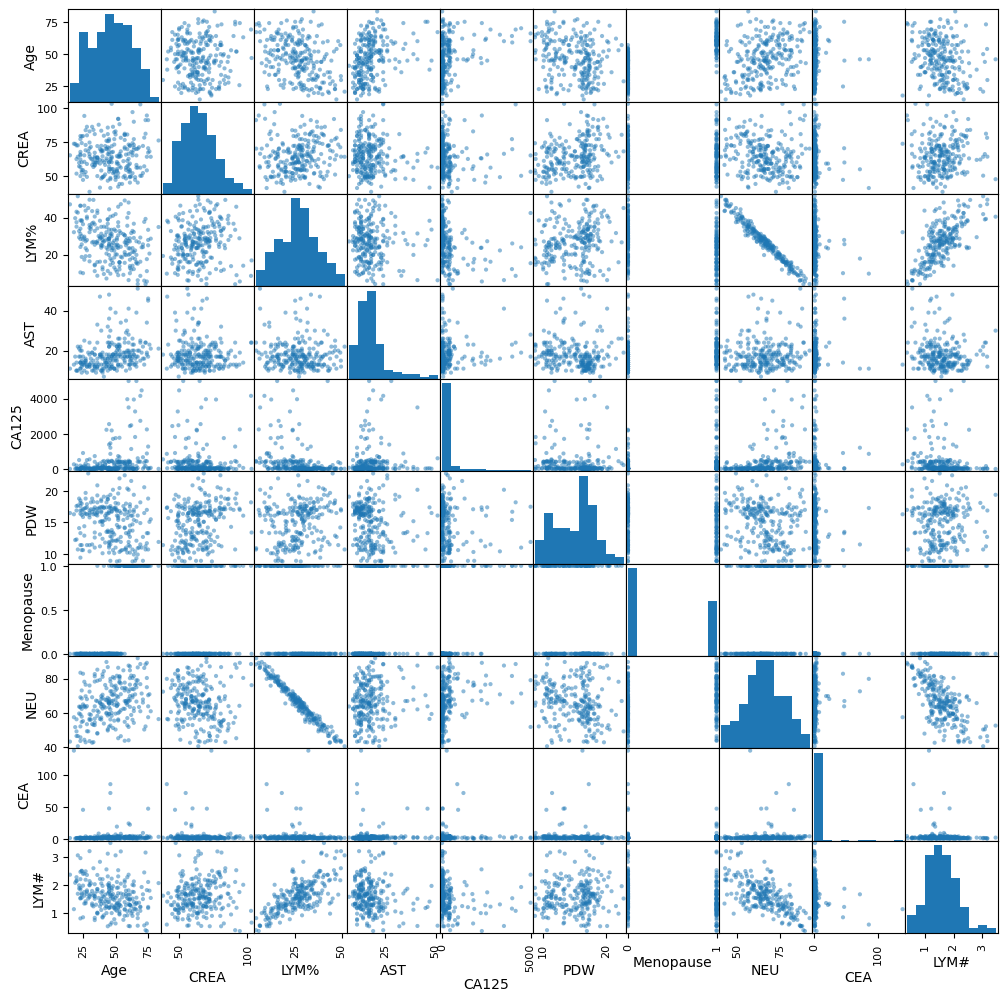

In [20]:
import matplotlib.pyplot as plt

# Create scatter plot matrix
pd.plotting.scatter_matrix(oc[selected_features], figsize=(12, 12))
plt.show()

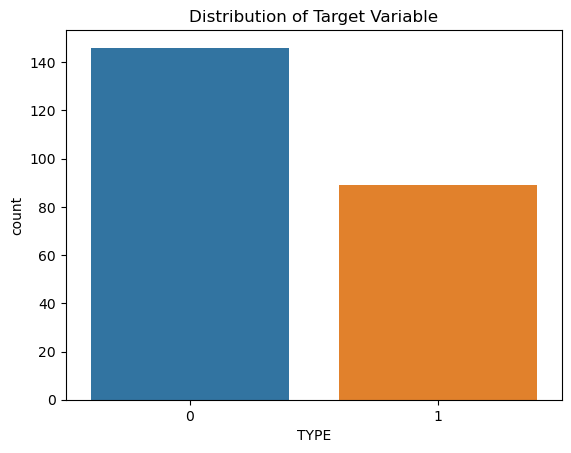

In [21]:
# Visualizing the distribution of the target variable in the training data
target_variable = oc['TYPE']
sns.countplot(x=target_variable, data=oc)
plt.title('Distribution of Target Variable')
plt.show()

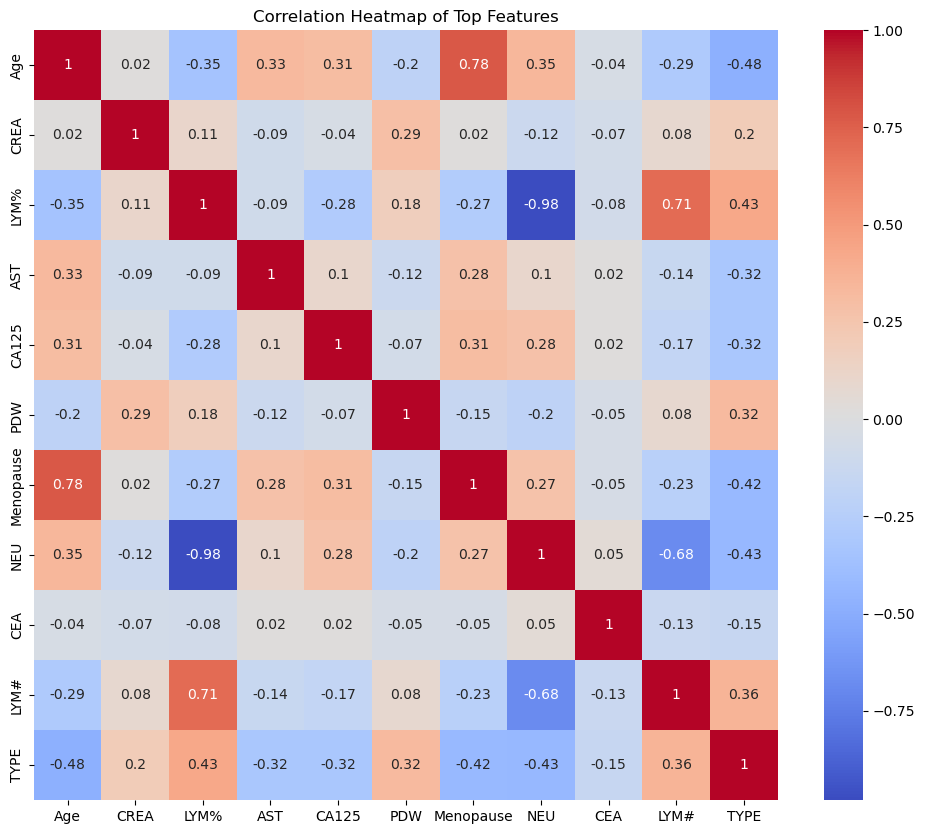

In [22]:
import seaborn as sns
# Create a correlation matrix
corr_matrix = np.around(oc[selected_cols].corr(), 2)

# Plot the heatmap using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

<Axes: xlabel='CREA', ylabel='Count'>

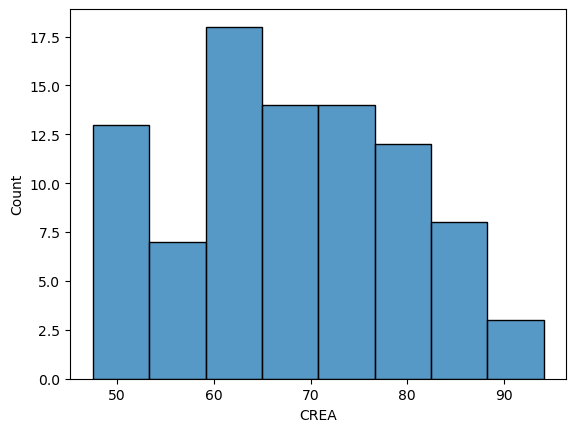

In [23]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "CREA")

<Axes: xlabel='PDW', ylabel='Count'>

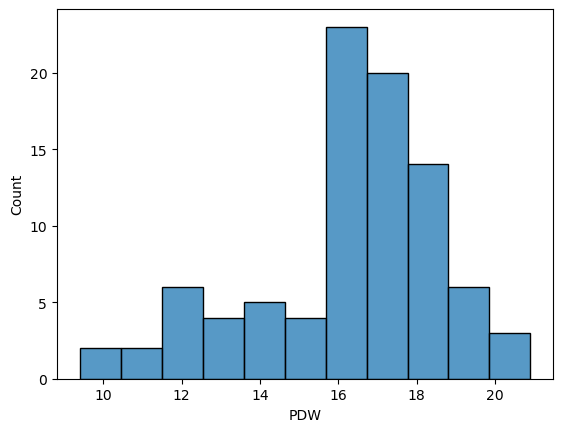

In [24]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "PDW")

<Axes: xlabel='LYM%', ylabel='Count'>

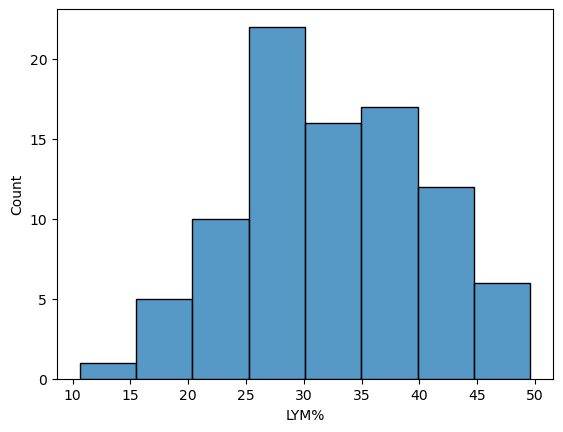

In [25]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "LYM%")

<Axes: xlabel='IBIL', ylabel='Count'>

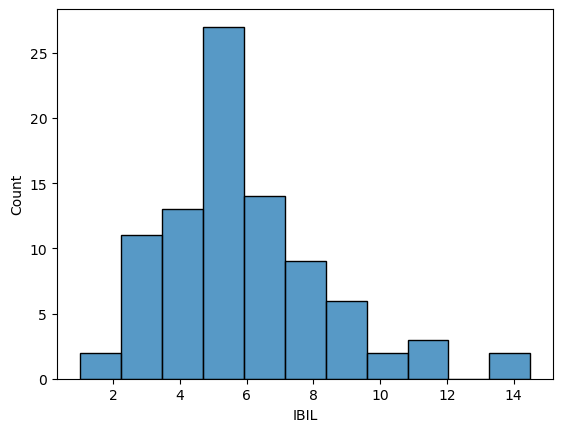

In [26]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "IBIL")

<Axes: xlabel='BASO%', ylabel='Count'>

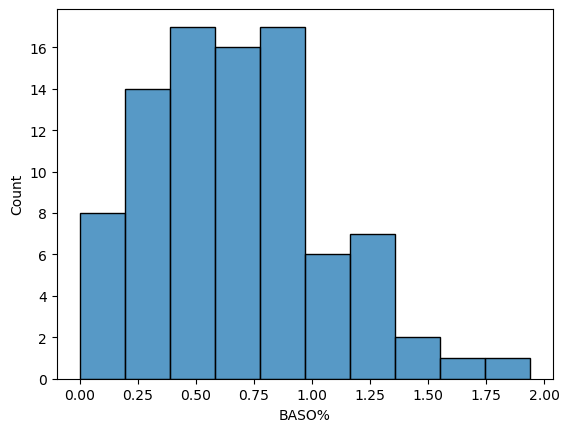

In [27]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "BASO%")

<Axes: xlabel='Age', ylabel='Count'>

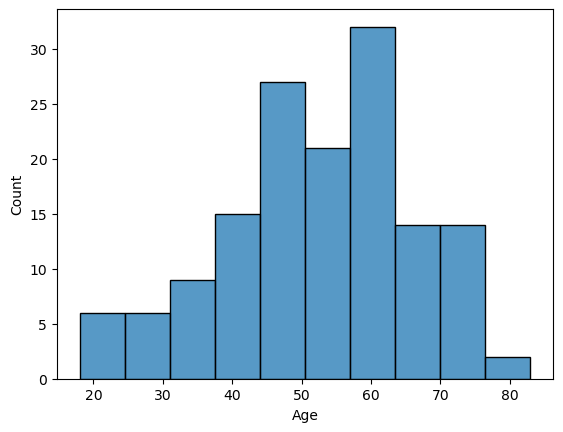

In [28]:
# Filter the data to only include positive values of the "TYPE" target column
positive_data = oc[oc['TYPE'] == 0]

# Create histogram using Seaborn
sns.histplot(data = positive_data, x = "Age")

<Axes: xlabel='Age', ylabel='Count'>

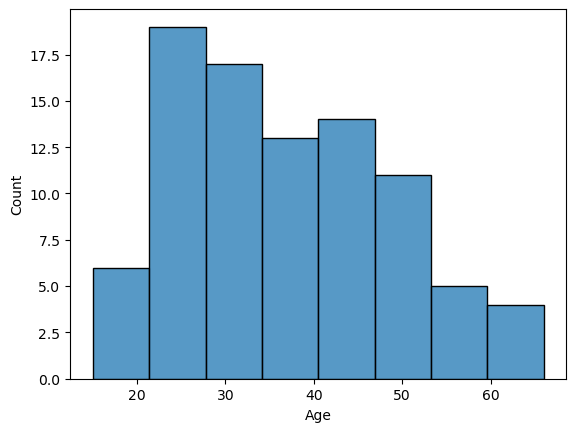

In [29]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "Age")

# BUILD PREDICTIVE MODELS

In [30]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(oc_X_train, oc_y_train, test_size=0.3, random_state=25)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [31]:
X_train.shape

(164, 10)

In [32]:
X_test.shape

(71, 10)

In [33]:
y_train.shape

(164,)

In [34]:
y_test.shape  

(71,)

In [35]:
y_test = y_test.values.reshape(-1, 1)

In [36]:
y_train = y_train.values.reshape(-1, 1)

In [37]:
y_train.shape

(164, 1)

In [38]:
y_test.shape

(71, 1)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# create SVM classifier
svm_model = SVC(kernel='linear')

# train the model
svm_model.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = svm_model.predict(X_test)

accuracy = svm_model.score(X_test, y_test)


# evaluate the model on the test set
print("SVM:")
print(classification_report(y_test, test_preds))

SVM:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        43
           1       0.69      0.86      0.76        28

    accuracy                           0.79        71
   macro avg       0.79      0.80      0.79        71
weighted avg       0.81      0.79      0.79        71



In [40]:
import math
math.sqrt(len(y_test))

8.426149773176359

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# train the model
knn.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)


# evaluate the model on the test set
print("KNN:")
print(classification_report(y_test, test_preds))

KNN:
              precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.69      0.79      0.73        28

    accuracy                           0.77        71
   macro avg       0.77      0.78      0.77        71
weighted avg       0.78      0.77      0.78        71



In [42]:
from sklearn.model_selection import cross_validate

In [43]:
#KNN model evaluation 
# 10-fold cv for KNN Model
knnNeigh = KNeighborsClassifier(n_neighbors=12)
cv_results = cross_validate(knnNeigh, oc_X_train, oc_y_train,
scoring='neg_mean_absolute_error', cv=10)
knnNeigh_scores = -1*cv_results['test_score']
knnNeigh_scores

array([0.25      , 0.20833333, 0.04166667, 0.125     , 0.25      ,
       0.26086957, 0.08695652, 0.2173913 , 0.30434783, 0.17391304])

In [44]:
knnNeigh_scores.mean()

0.19184782608695655

In [45]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)


# evaluate the model on the test set
print("Decision Trees:")
print(classification_report(y_test, y_pred))

Decision Trees:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        43
           1       0.62      0.54      0.58        28

    accuracy                           0.69        71
   macro avg       0.67      0.66      0.67        71
weighted avg       0.68      0.69      0.69        71



In [46]:
## 10-fold cv for Decision Tree Regression Model
dtcl = DecisionTreeClassifier()
cv_results = cross_validate(dtcl, oc_X_train, oc_y_train,
scoring='neg_mean_absolute_error', cv=10)
dtcl_scores = -1*cv_results['test_score']
dtcl_scores

array([0.125     , 0.25      , 0.16666667, 0.20833333, 0.04166667,
       0.34782609, 0.13043478, 0.17391304, 0.26086957, 0.2173913 ])

In [47]:
dtcl_scores.mean()

0.19221014492753624

In [48]:
from sklearn.metrics import mean_squared_error

# Above, # First Set of mRMR Selected Features with CA125 included ('Age', 'CREA', 'LYM%', 'AST', 'CA125', 'PDW',  'Menopause', 'NEU', 'CEA', 'LYM#') reflect Accuracy for SVM is 79%, KNN is 77%, and Decision Trees is 69%. SVM is the better performing model. Below, for CA125 alone, Accuracy reflects that SVM is 73%, KNN is 65%, and Decision Trees is 69%. This is a weaker perfomance than the mRMR Selected Featured models with CA125.

In [49]:
# split data into features (X) and target (y)
X = oc[['CA125']]
y = oc['TYPE']

In [50]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=25)

In [51]:
y_test1 = y_test1.values.reshape(-1, 1)

In [52]:
y_train1 = y_train1.values.reshape(-1, 1)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# create SVM classifier
svm_model1 = SVC(kernel='linear')

# train the model
svm_model1.fit(X_train1, y_train1)

# Predicting the target values for test data
test_preds1 = svm_model1.predict(X_test1)

accuracy1 = svm_model1.score(X_test1, y_test1)


# evaluate the model on the test set
print("SVM1:")
print(classification_report(y_test1, test_preds1))

SVM1:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75        43
           1       0.62      0.82      0.71        28

    accuracy                           0.73        71
   macro avg       0.74      0.75      0.73        71
weighted avg       0.76      0.73      0.74        71



In [54]:
import math
math.sqrt(len(y_test1))

8.426149773176359

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=9)

# train the model
knn1.fit(X_train1, y_train1)

# Predicting the target values for test data
test_preds1 = knn1.predict(X_test1)

accuracy1 = knn1.score(X_test1, y_test1)


# evaluate the model on the test set
print("KNN1:")
print(classification_report(y_test1, test_preds1))

KNN1:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        43
           1       0.57      0.43      0.49        28

    accuracy                           0.65        71
   macro avg       0.63      0.61      0.61        71
weighted avg       0.64      0.65      0.64        71



In [56]:
from sklearn.model_selection import cross_validate

In [57]:
#KNN model evaluation 
# 10-fold cv for KNN Model
knnNeigh1 = KNeighborsClassifier(n_neighbors=12)
cv_results1 = cross_validate(knnNeigh1, X, y,
scoring ='neg_mean_absolute_error', cv=10)
knnNeigh_scores1 = -1*cv_results1['test_score']
knnNeigh_scores1


array([0.33333333, 0.33333333, 0.20833333, 0.20833333, 0.25      ,
       0.30434783, 0.30434783, 0.26086957, 0.52173913, 0.2173913 ])

In [58]:
knnNeigh_scores1.mean()

0.2942028985507247

In [59]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier
dt1 = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
dt1.fit(X_train1, y_train1)

# predict on the test data
y_pred1 = dt1.predict(X_test1)

accuracy1 = dt1.score(X_test1, y_test1)


# evaluate the model on the test set
print("Decision Trees1:")
print(classification_report(y_test1, y_pred1))

Decision Trees1:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        43
           1       0.62      0.57      0.59        28

    accuracy                           0.69        71
   macro avg       0.67      0.67      0.67        71
weighted avg       0.69      0.69      0.69        71



In [60]:
## 10-fold cv for Decision Tree Regression Model
dtcl1 = DecisionTreeClassifier()
cv_results1 = cross_validate(dtcl1, X, y,
scoring='neg_mean_absolute_error', cv=10)
dtcl_scores1 = -1*cv_results1['test_score']
dtcl_scores1

array([0.375     , 0.29166667, 0.25      , 0.33333333, 0.20833333,
       0.2173913 , 0.26086957, 0.43478261, 0.39130435, 0.2173913 ])

In [61]:
dtcl_scores1.mean()

0.29800724637681164